# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [3]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [3]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [13]:
# First we should standarize data, DATA PREPROCESSING!!!
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [ ]:
# Your code here :
X = data.drop('MEDV', axis=1)


In [10]:
y = data["MEDV"]

In [11]:
X
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split

# Split trains sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check train and test sizes
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(506, 13) (404, 13) (102, 13)
(506,) (404,) (102,)


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [18]:
# Your code here :
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

print('coef ', lm.coef_)
print('intercept ', lm.intercept_)

# predictions: 
y_train_pred = lm.predict(X_train)
y_pred = lm.predict(X_test)
y_pred.shape
y_train_pred.shape

coef  [-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]
intercept  30.246750993923865


(404,)

In [17]:
y_train_pred
y_pred

array([28.99672362, 36.02556534, 14.81694405, 25.03197915, 18.76987992,
       23.25442929, 17.66253818, 14.34119   , 23.01320703, 20.63245597,
       24.90850512, 18.63883645, -6.08842184, 21.75834668, 19.23922576,
       26.19319733, 20.64773313,  5.79472718, 40.50033966, 17.61289074,
       27.24909479, 30.06625441, 11.34179277, 24.16077616, 17.86058499,
       15.83609765, 22.78148106, 14.57704449, 22.43626052, 19.19631835,
       22.43383455, 25.21979081, 25.93909562, 17.70162434, 16.76911711,
       16.95125411, 31.23340153, 20.13246729, 23.76579011, 24.6322925 ,
       13.94204955, 32.25576301, 42.67251161, 17.32745046, 27.27618614,
       16.99310991, 14.07009109, 25.90341861, 20.29485982, 29.95339638,
       21.28860173, 34.34451856, 16.04739105, 26.22562412, 39.53939798,
       22.57950697, 18.84531367, 32.72531661, 25.0673037 , 12.88628956,
       22.68221908, 30.48287757, 31.52626806, 15.90148607, 20.22094826,
       16.71089812, 20.52384893, 25.96356264, 30.61607978, 11.59

## 3. Calculate and print R-squared for both the training and the testing set.

In [19]:
# Your code here :
from sklearn.metrics import r2_score

print("Train R2-Score ", r2_score(y_train, y_train_pred))
print("Test R2-Score ", r2_score(y_test, y_pred))

Train R2-Score  0.7508856358979673
Test R2-Score  0.6687594935356326


## 4. Calculate and print mean squared error for both the training and the testing set.

In [24]:
# Your code here :
from sklearn.metrics import mean_squared_error 

print("Train MSE ", mean_squared_error(y_train, y_train_pred))
print("Test MSE ", mean_squared_error(y_test, y_pred))

Train MSE  21.641412753226312
Test MSE  24.291119474973478


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [34]:
# Your code here :
from sklearn.metrics import mean_absolute_error

print("Train MAE ", mean_absolute_error(y_train, y_train_pred))
print("Test MAE ", mean_absolute_error(y_test, y_pred))

Train MAE  3.314771626783229
Test MAE  3.1890919658878416


## Classification Model Evaluation

In [39]:
from sklearn.datasets import load_iris
data = load_iris()

In [40]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [47]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [48]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [42]:
column_names = data.feature_names
column_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [43]:
df = pd.DataFrame(data['data'],columns=column_names)

In [44]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [46]:
target = pd.DataFrame(data.target)

In [49]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [51]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [53]:
# Your code here :
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=33)

print(df.shape, X_train.shape, X_test.shape)
print(target.shape, y_train.shape, y_test.shape)

(150, 4) (120, 4) (30, 4)
(150, 1) (120, 1) (30, 1)


## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [57]:
# Your code here :
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

print('coef ', lr.coef_)
print('intercept ', lr.intercept_)

y_train_pred = lr.predict(X_train)
y_pred = lr.predict(X_test)

coef  [[-0.39293557  0.89134874 -2.35986421 -0.98859259]
 [ 0.43358929 -0.43557879 -0.08806318 -0.88890049]
 [-0.04065372 -0.45576995  2.44792738  1.87749308]]
intercept  [  9.12728365   2.52252724 -11.64981089]


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [60]:
# Your code here :
from sklearn.metrics import accuracy_score

print('Train accuracy ', accuracy_score(y_train, y_train_pred))
print('Test accuracy ', accuracy_score(y_test, y_pred))

Train accuracy  0.9666666666666667
Test accuracy  0.9333333333333333


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [67]:
# Your code here :
from sklearn.metrics import balanced_accuracy_score

print('Train balanced accuracy ', balanced_accuracy_score(y_train, y_train_pred))
print('Test balanced accuracy ', balanced_accuracy_score(y_test, y_pred))

Train balanced accuracy  0.9656084656084656
Test balanced accuracy  0.9523809523809524


## 10. Calculate and print the precision score for both the training and the testing set.

In [ ]:
# Your code here :
from sklearn.metrics import precision_score

print('Train precision_score ', precision_score(y_train, y_train_pred, average='macro'))
print('Test precision_score ', precision_score(y_test, y_pred, average='macro'))

Train precision_score  0.9656084656084656
Test precision_score  0.9333333333333332


## 11. Calculate and print the recall score for both the training and the testing set.

In [70]:
# Your code here :
from sklearn.metrics import recall_score

print('Train recall score ', recall_score(y_train, y_train_pred, average='macro'))
print('Test recall score ', recall_score(y_test, y_pred, average='macro'))

Train recall score  0.9656084656084656
Test recall score  0.9523809523809524


## 12. Calculate and print the F1 score for both the training and the testing set.

In [73]:
# Your code here :
from sklearn.metrics import f1_score

print('Train f1_score ', f1_score(y_train, y_train_pred, average='macro'))
print('Test f1_score ', f1_score(y_test, y_pred, average='macro'))

Train f1_score  0.9656084656084656
Test f1_score  0.9373219373219372


## 13. Generate confusion matrices for both the training and the testing set.

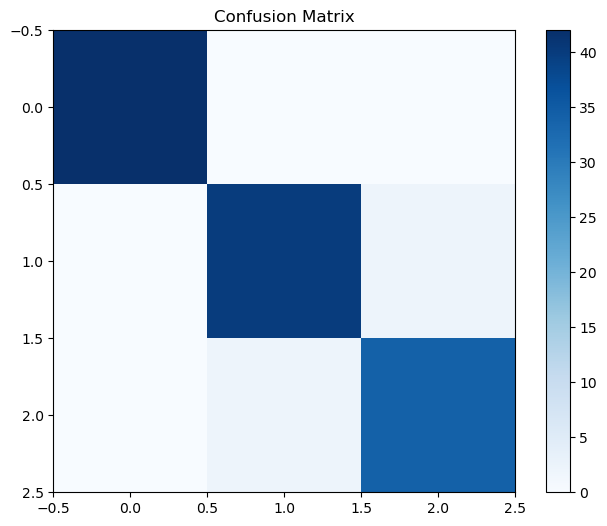

In [ ]:
# Your code here :
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm =confusion_matrix(y_train, y_train_pred)
    
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Trainig set')
plt.colorbar()
    


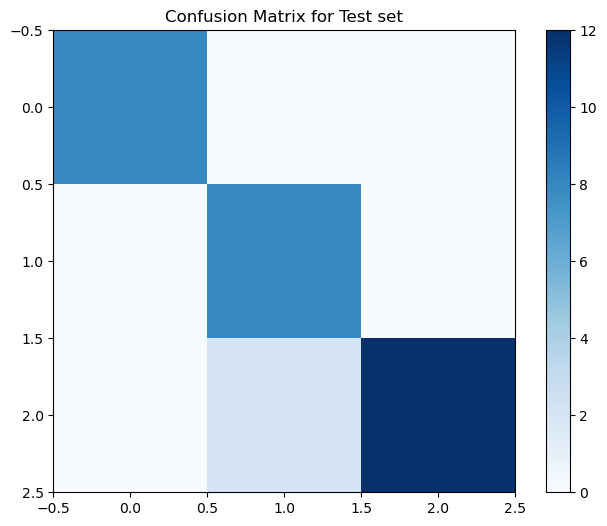

In [81]:
cmTest =confusion_matrix(y_test, y_pred)
    
plt.figure(figsize=(8, 6))
plt.imshow(cmTest, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Test set')
plt.colorbar()
    

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [26]:
# Have fun here !